# Number Preprocessing

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data_path = os.path.expanduser("../../data/diabetes.csv")
df = pd.read_csv(data_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Inspecting the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visualizing the dataset

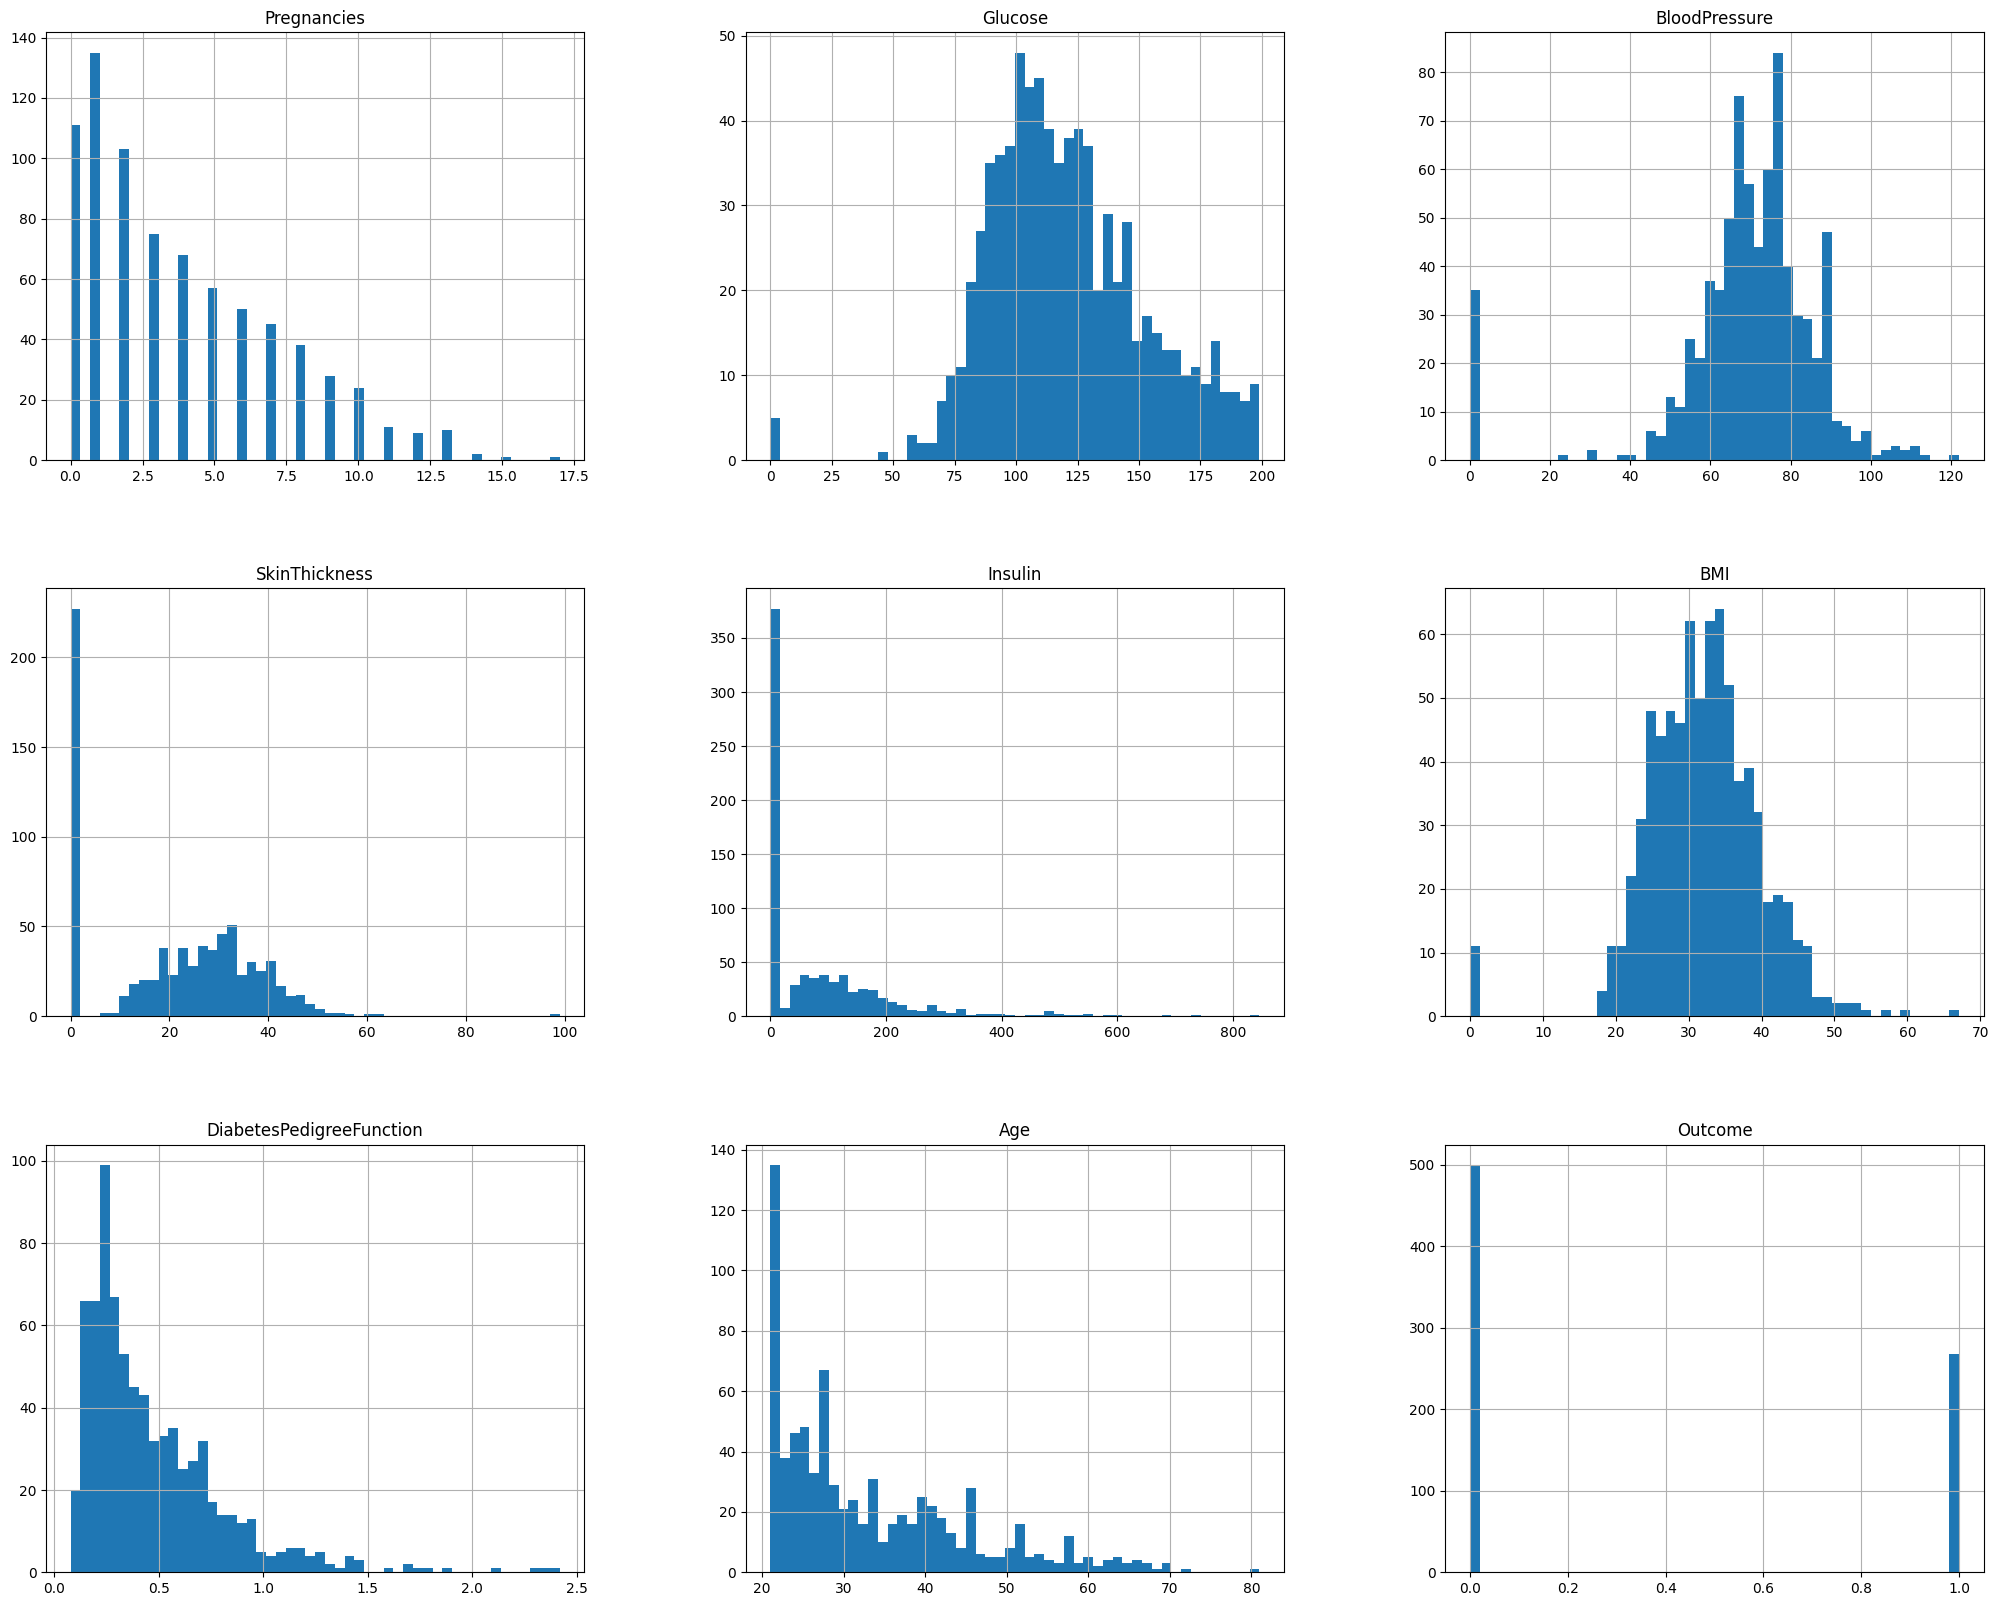

In [5]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

## Removing duplicated data points

In [6]:
df.drop_duplicates(keep="first", inplace=True)

## Creating training and testing set

In [8]:
train_df, test_df = train_test_split(df, test_size=0.2)

## Gaining further insight

In [9]:
correlation_matrix = train_df.corr(method="pearson")
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.135109,0.164122,-0.041149,-0.056988,0.017513,-0.015260,0.537494,0.217668
Glucose,0.135109,1.000000,0.164170,0.048504,0.328315,0.210757,0.125436,0.269642,0.475968
BloodPressure,0.164122,0.164170,1.000000,0.214924,0.080210,0.249102,0.044764,0.241728,0.114867
SkinThickness,-0.041149,0.048504,0.214924,1.000000,0.424873,0.391442,0.176407,-0.088288,0.097148
Insulin,-0.056988,0.328315,0.080210,0.424873,1.000000,0.193953,0.140380,-0.034457,0.140022
BMI,0.017513,0.210757,0.249102,0.391442,0.193953,1.000000,0.126622,0.020420,0.306521
DiabetesPedigreeFunction,-0.015260,0.125436,0.044764,0.176407,0.140380,0.126622,1.000000,0.051460,0.170353
Age,0.537494,0.269642,0.241728,-0.088288,-0.034457,0.020420,0.051460,1.000000,0.234581
Outcome,0.217668,0.475968,0.114867,0.097148,0.140022,0.306521,0.170353,0.234581,1.000000


In [10]:
correlation_matrix["Outcome"].sort_values()

SkinThickness               0.097148
BloodPressure               0.114867
Insulin                     0.140022
DiabetesPedigreeFunction    0.170353
Pregnancies                 0.217668
Age                         0.234581
BMI                         0.306521
Glucose                     0.475968
Outcome                     1.000000
Name: Outcome, dtype: float64

## Handling missing data

In [15]:
names = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
]

for name in names:
    train_df[name].replace(0, np.nan, inplace=True)

/var/folders/7w/fv5n0x414253d7dv5g2wwmb40000gn/T/ipykernel_1701/551462321.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[name].replace(0, np.nan, inplace=True)


In [16]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
683,4,125.0,80.0,NaN,NaN,32.3,0.536,27,1
394,4,158.0,78.0,NaN,NaN,32.9,0.803,31,1
190,3,111.0,62.0,NaN,NaN,22.6,0.142,21,0
274,13,106.0,70.0,NaN,NaN,34.2,0.251,52,0
162,0,114.0,80.0,34.0,285.0,44.2,0.167,27,0


In [17]:
glucose_median = train_df["Glucose"].median()
blood_pressure_median = train_df["BloodPressure"].median()
skin_thickness_median = train_df["SkinThickness"].median()
insulin_median = train_df["Insulin"].median()
bmi_median = train_df["BMI"].median()
age_median = train_df["Age"].median()
dpf_median = train_df["DiabetesPedigreeFunction"].median()

train_df["Glucose"].fillna(glucose_median, inplace=True)
train_df["BloodPressure"].fillna(blood_pressure_median, inplace=True)
train_df["SkinThickness"].fillna(skin_thickness_median, inplace=True)
train_df["Insulin"].fillna(insulin_median, inplace=True)
train_df["BMI"].fillna(bmi_median, inplace=True)
train_df["Age"].fillna(age_median, inplace=True)
train_df["DiabetesPedigreeFunction"].fillna(dpf_median, inplace=True)

/var/folders/7w/fv5n0x414253d7dv5g2wwmb40000gn/T/ipykernel_1701/2039840509.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BMI"].fillna(bmi_median, inplace=True)
/var/folders/7w/fv5n0x414253d7dv5g2wwmb40000gn/T/ipykernel_1701/2039840509.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [18]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
683,4,125.0,80.0,29.0,125.0,32.3,0.536,27,1
394,4,158.0,78.0,29.0,125.0,32.9,0.803,31,1
190,3,111.0,62.0,29.0,125.0,22.6,0.142,21,0
274,13,106.0,70.0,29.0,125.0,34.2,0.251,52,0
162,0,114.0,80.0,34.0,285.0,44.2,0.167,27,0


## Encoding categorial attributes

In [19]:
# Copy original dataframe and add new column with random fitness values
temp_df = train_df.copy()
fitness_values = [
    "bad",
    "moderate",
    "good",
    "very good",
]
temp_df["fitness"] = np.random.choice(fitness_values, temp_df.shape[0])

temp_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,fitness
683,4,125.0,80.0,29.0,125.0,32.3,0.536,27,1,very good
394,4,158.0,78.0,29.0,125.0,32.9,0.803,31,1,very good
190,3,111.0,62.0,29.0,125.0,22.6,0.142,21,0,bad
274,13,106.0,70.0,29.0,125.0,34.2,0.251,52,0,moderate
162,0,114.0,80.0,34.0,285.0,44.2,0.167,27,0,very good


In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
fitness_encoded = encoder.fit_transform(temp_df["fitness"])

for id_, class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")

print()
print(f"Encoded fitness values for first 10 entries: {fitness_encoded[:10]}")

class id 0 has label bad
class id 1 has label good
class id 2 has label moderate
class id 3 has label very good

Encoded fitness values for first 10 entries: [3 3 0 2 3 0 1 3 2 1]


## Rescaling or standardizing attributes

In [21]:
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()

temp1_df = train_df.copy()
column_names = temp1_df.columns.tolist()

# transform all attributes
temp1_df[column_names] = mm_scaler.fit_transform(temp1_df[column_names])

temp1_df.sort_index(inplace=True)
temp1_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,0.470588,0.896774,0.444444,0.239130,0.133413,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.466667,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
5,0.294118,0.464516,0.555556,0.239130,0.133413,0.151329,0.052519,0.150000,0.0
6,0.176471,0.219355,0.288889,0.271739,0.088942,0.261759,0.072588,0.083333,1.0
7,0.588235,0.458065,0.533333,0.239130,0.133413,0.349693,0.023911,0.133333,0.0


In [22]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

temp2_df = train_df.copy()

# transform all attributes
temp2_df[column_names] = mm_scaler.fit_transform(temp2_df[column_names])
temp2_df.sort_index(inplace=True)
temp2_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,0.470588,0.896774,0.444444,0.239130,0.133413,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.466667,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
5,0.294118,0.464516,0.555556,0.239130,0.133413,0.151329,0.052519,0.150000,0.0
6,0.176471,0.219355,0.288889,0.271739,0.088942,0.261759,0.072588,0.083333,1.0
7,0.588235,0.458065,0.533333,0.239130,0.133413,0.349693,0.023911,0.133333,0.0
